In [2]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt 
import pennylane as qml
import pennylane.numpy as np 
from main.operators import *
from main.VarQFT import *
from main.circuits import *

In this notebook we show how to employ our framework to obtain the ground state of a coupled system. We will consider two harmonic oscilator coupled by the Hooke's law. Let $X_j$ and $P_j$ the position and momentum operators of the $j$-th oscilator. The Hamiltonian is
$$ H = \frac{1}{2}\left[ P_1^2 + X_1^2 + P_2^2 + X_2^2 + ( X_1 - X_2)^2  \right]. $$
To create the operator $X_1 - X_2$ we have to use the function ```distance```.

In [22]:
num_wires = 2
dev = qml.device( "default.qubit", 
                    wires=2*num_wires, shots=100)

In [25]:
X1, P1 = X_and_P_ops( range(num_wires), -5, 5 )    
X2, P2 = X_and_P_ops( range(num_wires,2*num_wires), -5, 5 )    

H12 = [ 
        X1.pow(2),
        X2.pow(2),
        P1.pow(2),
        P2.pow(2),
        distance( X1, X2 ).pow(2)
        ]
H12 

[<Hamiltonian: terms=1, wires=[0, 1]>,
 <Hamiltonian: terms=1, wires=[2, 3]>,
 <Hamiltonian: terms=1, wires=[0, 1]>,
 <Hamiltonian: terms=1, wires=[2, 3]>,
 <Hamiltonian: terms=1, wires=[0, 1, 2, 3]>]

In [28]:
num_params = RY_ansatz( num_wires, 2 ).num_params
params     = 0.01 * np.random.randn(num_params)
var_state  = RY_ansatz( num_wires, 2 ).construct_circuit

In [29]:
varqft = VarFourier( H12, 
                    dev, 
                    var_state )

In [31]:
Params, Energies = varqft.run( params, max_iterations=100 )

Step:    100, Energy:    39.550736


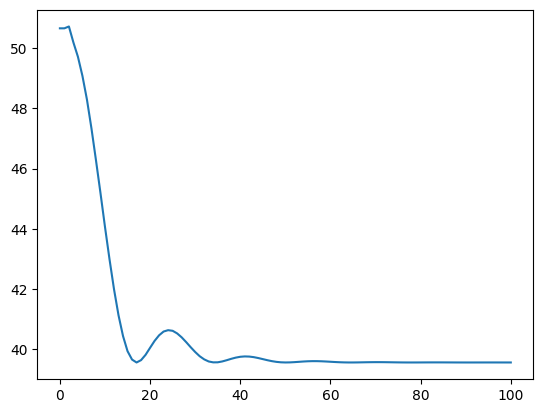

In [32]:
plt.plot( Energies )

In [34]:
dev = qml.device( "default.qubit", 
                    wires=2*num_wires )

ground_state = varqft.state( Params[-1] )

DeviceError: Measurement state(wires=[0, 1, 2, 3]) not accepted with finite shots on default.qubit